### 중요  : XOR 학습하기 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.set_random_seed(777)  # for reproducibility
learning_rate = 0.1

In [3]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [4]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [5]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [6]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [7]:
# Launch graph
sess = tf.Session()

In [8]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

In [9]:
vc=[]

In [12]:
for i in range(50001):
    sess.run(train, feed_dict={X: x_data, Y: y_data})

    if i % 1000 ==0:
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        print('step={} / cost={}'.format(i, c1))
    
    vc.append(cost)

step=0 / cost=0.27841538190841675
step=1000 / cost=0.24802133440971375
step=2000 / cost=0.2396419793367386
step=3000 / cost=0.21751776337623596
step=4000 / cost=0.18130797147750854
step=5000 / cost=0.11419883370399475
step=6000 / cost=0.04852781817317009
step=7000 / cost=0.024354536086320877
step=8000 / cost=0.015100051648914814
step=9000 / cost=0.010625120252370834
step=10000 / cost=0.008077691309154034
step=11000 / cost=0.006461623124778271
step=12000 / cost=0.005356338806450367
step=13000 / cost=0.004557899199426174
step=14000 / cost=0.0039567481726408005
step=15000 / cost=0.0034892838448286057
step=16000 / cost=0.0031162453815340996
step=17000 / cost=0.0028121930081397295
step=18000 / cost=0.002559973392635584
step=19000 / cost=0.0023476050700992346
step=20000 / cost=0.0021665135864168406
step=21000 / cost=0.002010367577895522
step=22000 / cost=0.0018744596745818853
step=23000 / cost=0.001755129313096404
step=24000 / cost=0.0016495785675942898
step=25000 / cost=0.001555609051138162

### 결과 확인하기

In [13]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1)
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)
    #l2cast = tf.cast(l2 > 0.5, dtype=tf.float32)
    print( i, sess.run(l2))
    #print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])   

0 [[0.02516492]]
1 [[0.97117966]]
2 [[0.9766004]]
3 [[0.02239441]]


ValueError: setting an array element with a sequence.

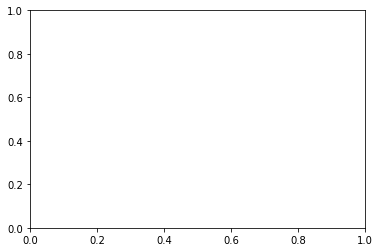

In [16]:
plt.plot(cost)

* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용

### 참고 : Sigmoid

In [18]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

1.0 --> 0.7310585975646973


Sigmoid를 그려볼까요?

In [19]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [13]:
for i in range(len(x1)):
    y1 = x1[i]
    y2 = sess.run(tf.sigmoid(y1))
    print('{} --> {}'.format(y1, y2))

-10.0 --> 4.5397868702434395e-05
-9.5 --> 7.484622751061123e-05
-9.0 --> 0.00012339457598623172
-8.5 --> 0.00020342697805520653
-8.0 --> 0.0003353501304664781
-7.5 --> 0.0005527786369235996
-7.0 --> 0.0009110511944006454
-6.5 --> 0.0015011822567369917
-6.0 --> 0.0024726231566347743
-5.5 --> 0.004070137715896128
-5.0 --> 0.0066928509242848554
-4.5 --> 0.01098694263059318
-4.0 --> 0.01798620996209156
-3.5 --> 0.02931223075135632
-3.0 --> 0.04742587317756678
-2.5 --> 0.07585818002124355
-2.0 --> 0.11920292202211755
-1.5 --> 0.18242552380635635
-1.0 --> 0.2689414213699951
-0.5 --> 0.3775406687981454
0.0 --> 0.5
0.5 --> 0.6224593312018546
1.0 --> 0.7310585786300049
1.5 --> 0.8175744761936437
2.0 --> 0.8807970779778823
2.5 --> 0.9241418199787566
3.0 --> 0.9525741268224334
3.5 --> 0.9706877692486436
4.0 --> 0.9820137900379085
4.5 --> 0.9890130573694068
5.0 --> 0.9933071490757153
5.5 --> 0.995929862284104
6.0 --> 0.9975273768433653
6.5 --> 0.998498817743263
7.0 --> 0.9990889488055994
7.5 --> 0